In [1]:
## Poisson Equation
# Load  FEM Packages
from fenics import *
from mshr import *
# Plotting Libraries
import matplotlib.pyplot as plt
plt.style.use("_classic_test_patch")


In [2]:
# Function Definition
def PlotFields(u_field, e_field):
    """
    PlotFields(u_field, e_field)
    """
    fig = plt.figure(figsize = (14,10))                       # Set the resolution
    plt.subplot(121)
    figU = plot(u_field)
    plt.colorbar(figU, shrink=0.5)
    plt.title("Potential Field")
    plt.subplot(122)
    figE = plot(e_field)
    plt.colorbar(figE, shrink = 0.5)
    plt.title("Electric Field")
    plt.show()

In [3]:
# Define constants
innerR = 2.5
outerR = 10.0
# create background geometry
domain = Circle(Point(0,0), outerR)
# create source and sink circles
innerCirc = Circle(Point(0, 0), innerR)


In [4]:
# assign the circles to the domain
domain.set_subdomain(1, innerCirc)

# generate the mesh
mesh = generate_mesh(domain, 25)

In [5]:
# define subdomain markers and facets
markers = MeshFunction('size_t',mesh, mesh.topology().dim(), mesh.domains())
boundaries = MeshFunction('size_t',mesh, mesh.topology().dim()-1, mesh.domains())

# define function space
V = FunctionSpace(mesh, 'Lagrange', 1) # a first order lagrangian function

In [6]:
# establish BCs for subdomains
marked_cells = SubsetIterator(markers,1) #inner circle
for cells in marked_cells:
    for f in facets(cells):
        boundaries[f] = 2    

Iterating over subset, found 155 entities out of 2417.


In [7]:
def boundary(x, on_boundary):
    return on_boundary

bc1 = DirichletBC(V, Constant("0"), boundary)
bc2 = DirichletBC(V, Constant("10.0"), boundaries, 2)
bc = [bc1, bc2]

In [8]:
dx = Measure('dx', domain=mesh, subdomain_data=markers)
u = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(u), grad(v)) * dx
L = Constant('0') * v * dx
u = Function(V)
solve(a == L, u, bc)

Solving linear variational problem.


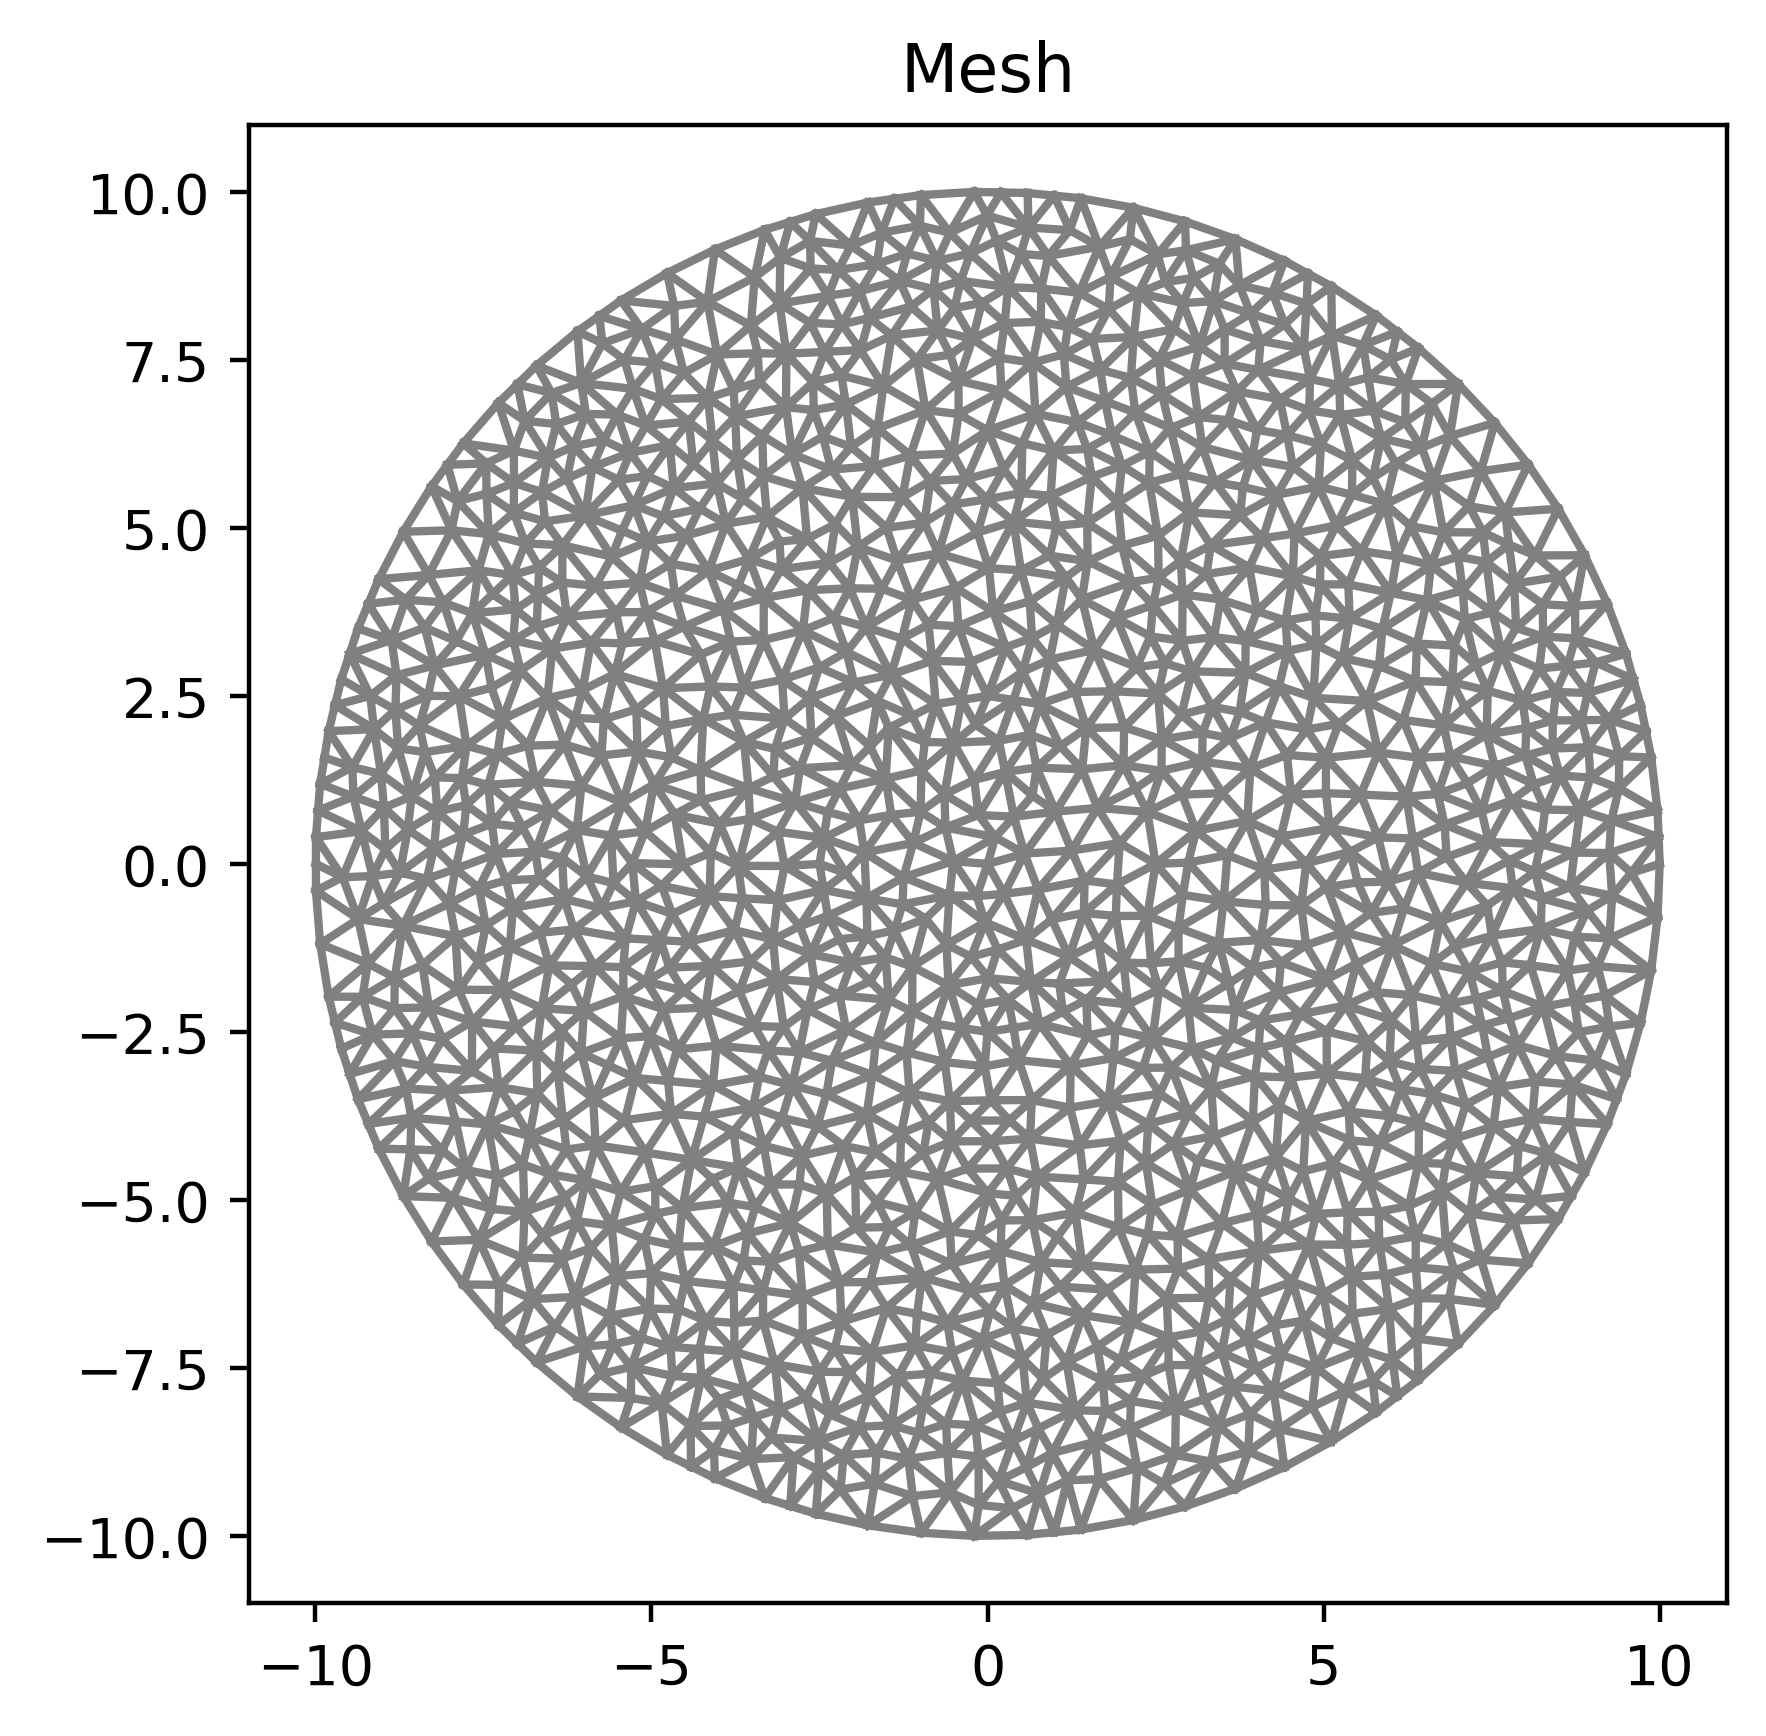

In [9]:
## Plotting the mesh
plt.figure(dpi=400)                       # Set the resolution
plot(mesh, title = 'Mesh')              # Set the title
# plt.show()

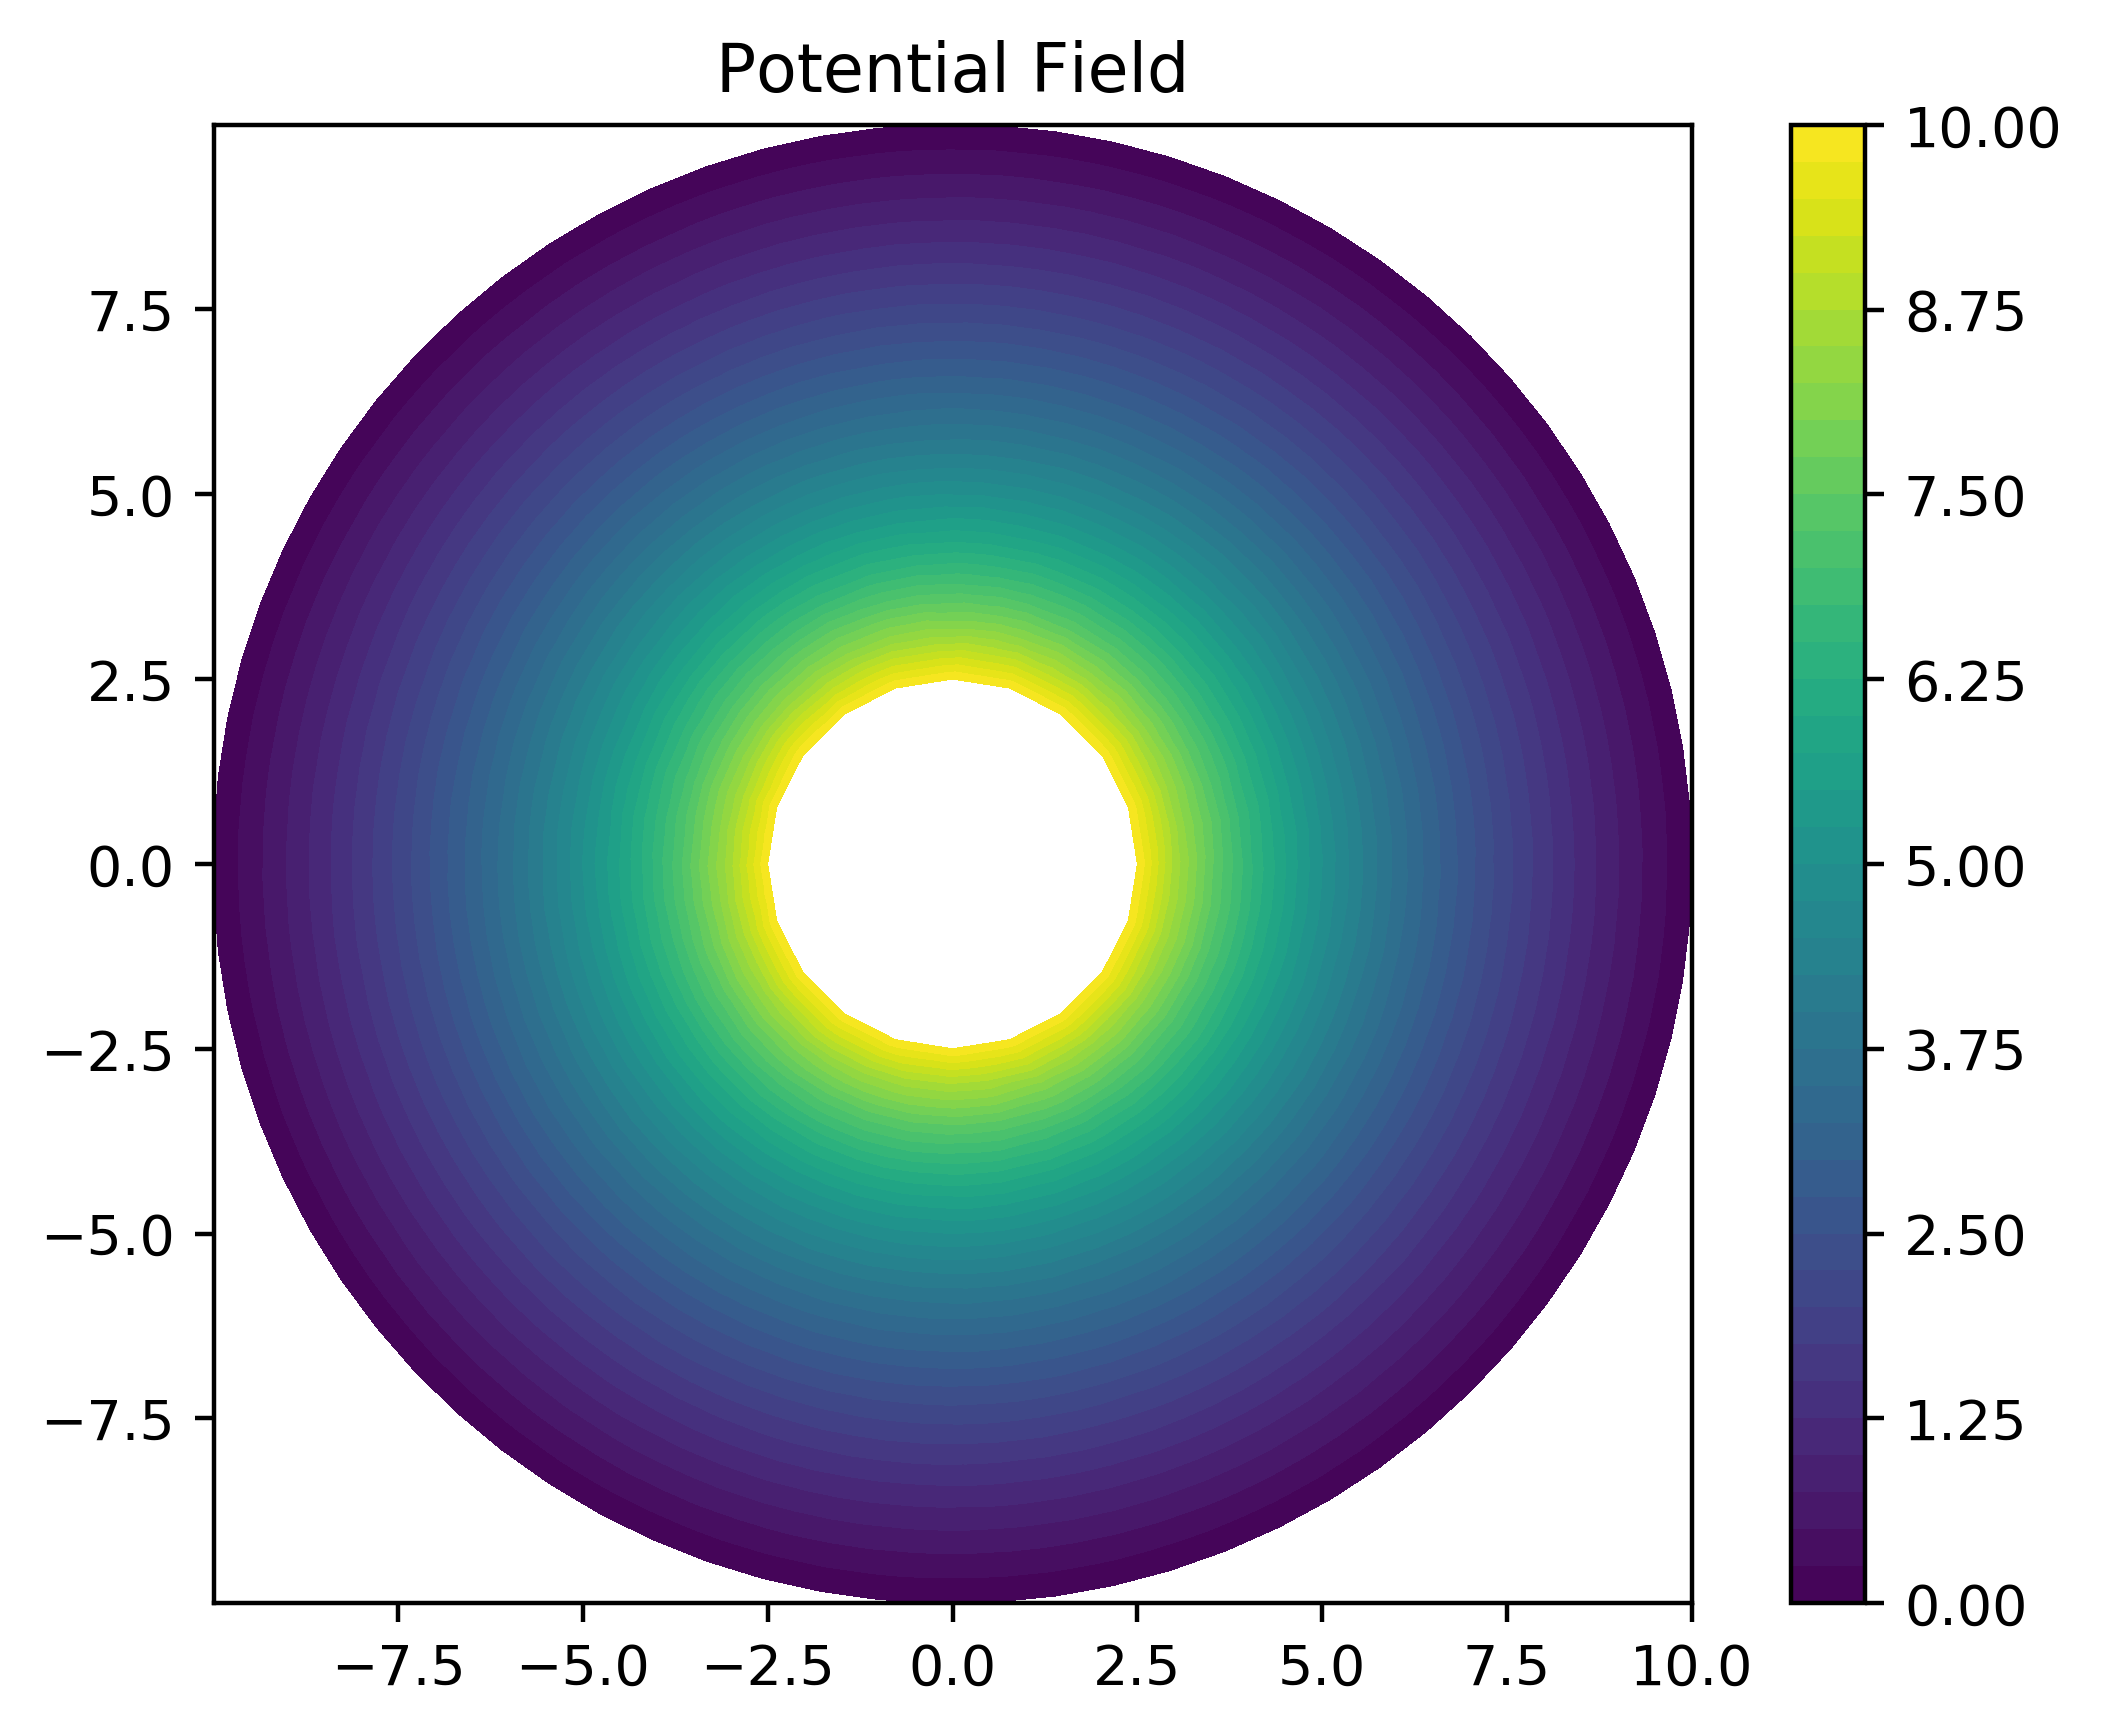

In [10]:
## Plotting the solution.
plt.figure(dpi=400)                       # Set the resolution
plot(u, title = 'Potential Field')              # Set the title
plt.colorbar(plot(u)) # Add a colorbar
plt.show()

Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.


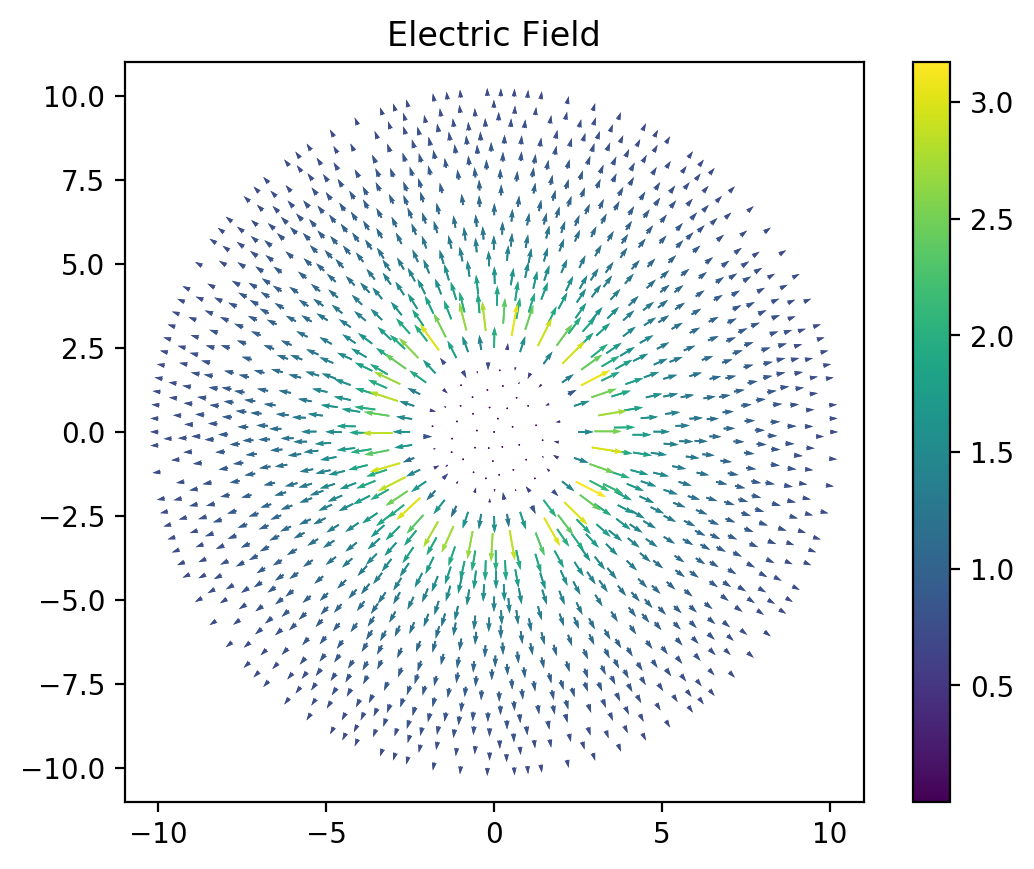

In [11]:
## Plotting the electric field.
e_field = - grad(u)
plt.figure(dpi=200)                       # Set the resolution
plot(e_field, title = 'Electric Field')              # Set the title
plt.colorbar(plot(e_field)) # Add a colorbar
plt.show()                  # Set the title

In [12]:
# # Plot the solution with the electric field
# plt.figure(dpi=400)                       # Set the resolution
# # plot(mesh, title = 'Mesh')              # Set the title
# plot(u, title = 'Potential Field')              # Set the title
# plot(e_field, title = 'Electric Field')              # Set the title
# plt.colorbar(plot(e_field)) # Add a colorbar
# plt.show()                  # Set the title

Object cannot be plotted directly, projecting to piecewise linears.


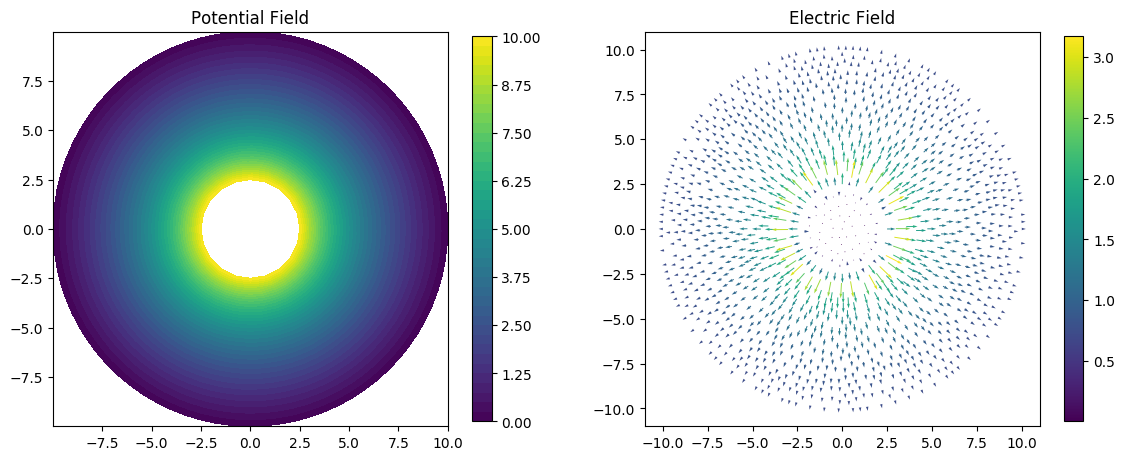

In [13]:
PlotFields(u, e_field)